OPT
Full Parameter: 1340923904
Trainable Parameter: 25165824
%:1.8767525826730285


llama2
Full Parameter: 6674456576  
Trainable Parameter: 67108864 
%:1.0054580958891837


gpt2
Full Parameter: 125m 
Trainable Parameter: 125m
%:100


t5-llm
Full Parameter: 220 million 
Trainable Parameter: 220 million
%:100


opt 1.3b, - gpt2- 125m , llama2 7B, t5-llm 220 million



opt 1.3b, - gpt2- 125m , llama2 7B, t5-llm 220 million

In [1]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# # Set plotting style
# sns.set_style("darkgrid")

# # Data
# models = ['LLAMA 2 (7B)', 'OPT 1.3B', 'GPT2 (125M)', 'T5-LLM (220M)']
# models = ['Llama2 (7B)', 'OPT 1.3B', 'GPT2 (125M)', 'T5 (220M)']
# full_parameters = [6674456576, 1340923904, 125e6, 220e6]  # Full parameters
# trainable_parameters = [67108864, 25165824, 125e6,  220e6]  # Trainable parameters

# # Normalize to billions for readability
# full_parameters = [p / 1e9 for p in full_parameters]
# trainable_parameters = [p / 1e9 for p in trainable_parameters]

# # Bar plot settings
# x = np.arange(len(models))  # X-axis positions
# bar_width = 0.6  # Width of the bars

# # Plot the full parameters in green
# plt.bar(x, full_parameters, width=bar_width, color='green', label='Full Parameters')

# # Overlay the trainable parameters in orange
# plt.bar(x, trainable_parameters, width=bar_width, color='orange', label='Trainable Parameters')

# # Customizing the plot
# plt.xlabel('Models', fontsize=12)
# plt.ylabel('Parameters (in Billions)', fontsize=12)
# plt.title('Comparison of Full and Trainable Parameters', fontsize=14)
# plt.xticks(x, models, rotation=15)
# plt.legend()
# plt.tight_layout()
# plt.grid(True)

# # Show the plot
# plt.show()

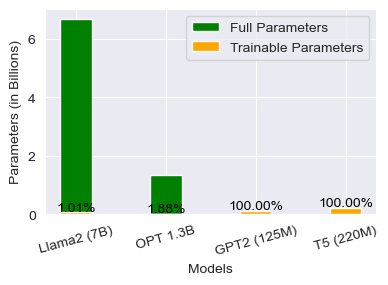

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from config.settings import GRAPH_SAVE_FOLDER, colors, DPI, SAVE_FORMATS, bar_width as global_bar_width , figsize as global_figsize, title_req

from plotter import save_plot

# Data
models = ['Llama2 (7B)', 'OPT 1.3B', 'GPT2 (125M)', 'T5 (220M)']
full_parameters = [6674456576, 1340923904, 125e6, 220e6]  # Full parameters
trainable_parameters = [67108864, 25165824, 125e6, 220e6]  # Trainable parameters


# Normalize to billions for readability
full_parameters = [p / 1e9 for p in full_parameters]
trainable_parameters = [p / 1e9 for p in trainable_parameters]

# Calculate trainable parameter percentages
percentages = [(tp / fp) * 100 for tp, fp in zip(trainable_parameters, full_parameters)]

figsize = global_figsize
figsize = (4,3)

# Bar plot settings
x = np.arange(len(models))  # X-axis positions
bar_width = 0.35  # Width of the bars
# Create figure with specified size
fig = plt.figure(figsize=figsize)  # Set figure size (10 inches by 6 inches)
# Plot the full parameters in green
plt.bar(x, full_parameters, width=bar_width, color='green', label='Full Parameters')

# Overlay the trainable parameters in orange
plt.bar(x, trainable_parameters, width=bar_width, color='orange', label='Trainable Parameters')

# Annotate the percentage on top of each bar
for i, (tp, perc) in enumerate(zip(trainable_parameters, percentages)):
    plt.text(x[i], tp + 0.05, f'{perc:.2f}%', ha='center', color='black')

# Customizing the plot
plt.xlabel('Models')
plt.ylabel('Parameters (in Billions)')
# plt.title('Comparison of Full and Trainable Parameters')
plt.xticks(x, models, rotation=15)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

save_plot(fig, 'Trainable_Parameters_Graph', GRAPH_SAVE_FOLDER)


In [3]:
from plotter import plot_bar, save_plot
from config.settings import GRAPH_SAVE_FOLDER

In [4]:
# models = ['Llama2 (7B)', 'OPT 1.3B', 'GPT2 (125M)', 'T5 (220M)']
# # trainable_params = [6674456576, 1340923904, 125000000, 220000000]
# # trainable_params = [6.674456576, 1.340923904, 0.125, 0.220]
# trainable_params = [6.67, 1.34, 0.125, 0.220]
# # Plot Trainable Parameters
# plot_bar(
#     data=trainable_params,
#     labels=models,
#     ylabel='Trainable Parameters (%)',
#     title='Fraction of Trainable Parameters',
#     filename="Trainable_Parameters_Graph",
#     folder=GRAPH_SAVE_FOLDER
# )


VRAM USAGE
gpt = 3569
llama = 23919
opt = 7005
t5llm = 2321

In [5]:
from plotter import plot_bar, save_plot, plot_bar_adjust
from config.settings import GRAPH_SAVE_FOLDER
# methods = ['FUll llama2-7B', 'NetLLM', 'llama2-7B','opt','gpt2','t5llm']
# gpu_memory = [65.88, 27.24, 23.919,7.005,3.569,2.321]
methods = ['Full Fine-Tune llama2-7B', 'NetLLM','Llama2', 'OPT', 'GPT2', 'T5']
gpu_memory = [65.88, 27.24, 23.919,7.005,3.569,2.321]
# Plot GPU Memory Utilization
colors = ['blue', 'red', 'black', 'g', 'm', 'y', 'k', '#ff6347']
plot_bar_adjust(
    data=gpu_memory,
    labels=methods,
    ylabel='GPU Memory Utilization (GB)',
    title='GPU Memory Utilization',
    filename="GPU_Memory_Utilization_Graph",
    folder=GRAPH_SAVE_FOLDER,
    bar_width=0.5,
    figsize=(5,4),
    colors=colors
)

In [6]:
# Data and paths
models = ['Net-LLM', 'L4S-LLM']
valid_answer_percentages = [98, 99.96]
# Plot valid answer percentages
colors = ['red', 'black']
plot_bar(
    data=valid_answer_percentages,
    labels=models,
    ylabel='Generating Valid Answer (%)',
    title='Valid Answer Percentage by Model',
    filename="Valid_Answer_Percentage_Graph",
    folder=GRAPH_SAVE_FOLDER,
    colors=colors

)

In [7]:
from plotter import plot_bar, save_plot, plot_bar_adjust
from config.settings import GRAPH_SAVE_FOLDER
# Data and paths
models = ['Llama2-7B', 'Net-LLM' ]
times = [0.2, 0.04]  # Example times in seconds


models = ['llama2-7B','opt','gpt2','t5llm']
times = [0.039146607071161264,0.0394958832859993,0.041436186581850054,0.04114466696977615]

models = ['Full Fine-Tune Llama2','Llama2', 'OPT', 'GPT2', 'T5']
colors = ['blue', 'black', 'g', 'm', 'y', 'k', '#ff6347']
times = [0.200,0.039146607071161264,0.0394958832859993,0.041436186581850054,0.04114466696977615]


# Plot average answer generation times
plot_bar_adjust(
    data=times,
    labels=models,
    ylabel='Average Answer Generation Time (s)',
    title='Average Answer Generation Time by Model',
    filename="Answer_Generation_Time_Graph",
    folder=GRAPH_SAVE_FOLDER,
    bar_width=0.5,
    figsize=(5,4),
    colors=colors
)

In [8]:
# Data and paths
models = ['Llama2', 'OPT', 'GPT2', 'T5']
colors = ['black', 'g', 'm', 'y', 'k', '#ff6347']
# times = [14.418755293620958,0.29904726816548244, 0.1795850792858336, 0.3226693036821153]  # Example times in seconds
# times = [22.3058,0.2990, 0.1796, 0.3226]  # Example times in seconds

times = [14.41,0.2990, 0.1796, 0.3226]  # Example times in hours


# Plot Training Time
plot_bar(
    data=times,
    labels=models,
    ylabel='Training Time (h)',
    title='Training Time by Model',
    filename="Training_Time_Graph",
    folder=GRAPH_SAVE_FOLDER,
    bar_width=0.5,
    figsize=(5,4),
    colors=colors
)